In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

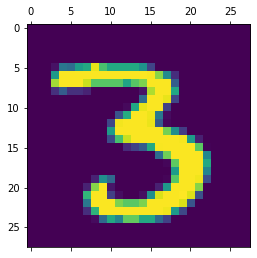

In [4]:
plt.matshow(X_train[12])

In [5]:
y_train[12]

3

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [9]:
X_train_flattened.shape

(60000, 784)

In [10]:
model =  keras.Sequential([
                  keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4731 - accuracy: 0.8759
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2735 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9257


In [11]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2731 - accuracy: 0.9226


[0.273124635219574, 0.9225999712944031]

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[10]

array([9.9944317e-01, 1.7726113e-07, 3.5084262e-01, 8.1123710e-02,
       1.6325712e-04, 8.4937465e-01, 3.6491215e-02, 2.8739332e-05,
       6.2264818e-01, 3.1599402e-04], dtype=float32)

In [13]:
np.argmax(y_predicted[10])

0

In [14]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[0]

7

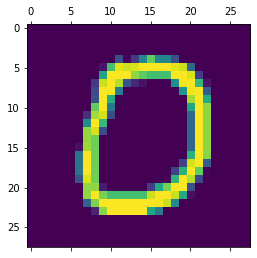

In [15]:
plt.matshow(X_test[10])

In [16]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    1,    0,    4,    4,    3,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [  12,   10,  900,   23,    8,    2,   13,   11,   50,    3],
       [   4,    0,   12,  934,    0,   19,    2,   10,   21,    8],
       [   2,    1,    3,    2,  909,    0,   11,    4,   10,   40],
       [  12,    3,    1,   40,   11,  756,   16,   10,   36,    7],
       [  15,    3,    5,    1,    7,    8,  914,    2,    3,    0],
       [   2,    7,   19,   10,    6,    0,    0,  949,    4,   31],
       [  11,    8,    5,   23,    9,   21,    8,   11,  871,    7],
       [  11,    7,    1,   10,   23,    7,    0,   27,    6,  917]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

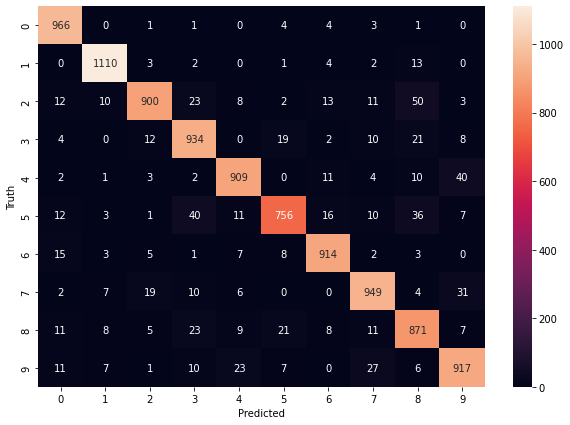

In [17]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

With Hidden layers

In [18]:
model =  keras.Sequential([
                  keras.layers.Dense(100,input_shape=(784,),activation='relu'),
                  keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2739 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1238 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9842


In [19]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9755


[0.07669271528720856, 0.9754999876022339]

Text(69.0, 0.5, 'Truth')

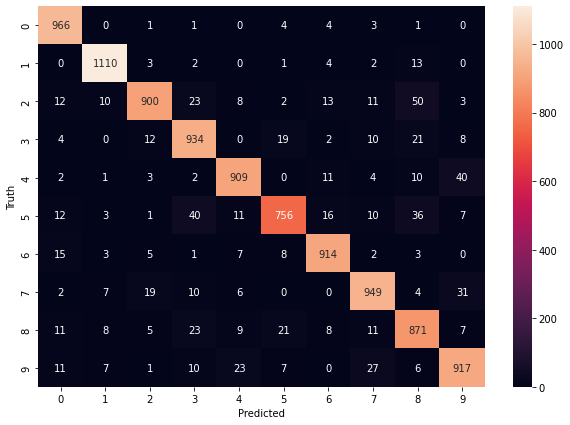

In [20]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
# model =  keras.Sequential([
#                   keras.layers.Flatten(input_shape=(28,28)),
#                   keras.layers.Dense(100,activation='relu'),
#                   keras.layers.Dense(10,activation='sigmoid')
# ])

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

#model.fit(X_train,y_train,epochs=5)